<a href="https://colab.research.google.com/github/MhmdVannes/Kurs-Jual-Beli-Valuta-Asing-Valas-JPY/blob/main/Tugas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Membaca data
df = pd.read_csv('https://raw.githubusercontent.com/MhmdVannes/Kurs-Jual-Beli-Valuta-Asing-Valas-JPY/main/data%20set.csv')
df.head()

,Beli,Jual
0,115.53,117.21
1,116.53,117.97
2,117.19,118.88
3,116.43,117.90
4,113.93,115.69


In [ ]:
# Menentukan target dan fitur
y = df['Beli']
X = df.drop(['Jual'],axis=1)

In [ ]:
# Dibagi menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [ ]:
# Pilih model
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [ ]:
# Model data latih
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [ ]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.981122155912634

In [ ]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.00469446, 0.00544715, 0.00211406, 0.00200558, 0.00189924]),
 'score_time': array([0.00301313, 0.00219917, 0.00136018, 0.00129652, 0.00129962]),
 'test_score': array([0.95776088, 0.94056821, 0.97423874, 0.93964507, 0.984212  ])}

In [ ]:
# evaluate the model on the test sample
dtr.score(X_test,y_test)

0.9570261867356731

In [ ]:
# model hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [ ]:
# hyperparameters selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [ ]:
# import pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# define pipe line
pipe = Pipeline([('model', dtr)])

In [ ]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)

In [ ]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [ ]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [ ]:
# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 9,
 'model__random_state': 2529}

In [ ]:
# select best estimator
best = grid.best_estimator_

In [ ]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=9, random_state=2529))])

In [ ]:
# predict with best estimator
y_pred=best.predict(X_test)

In [ ]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# mean absolute error
mean_absolute_error(y_test,y_pred)

0.12749999999999845

In [ ]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.001056763598151404

In [ ]:
# r square
r2_score(y_test,y_pred)

0.9958321753362983

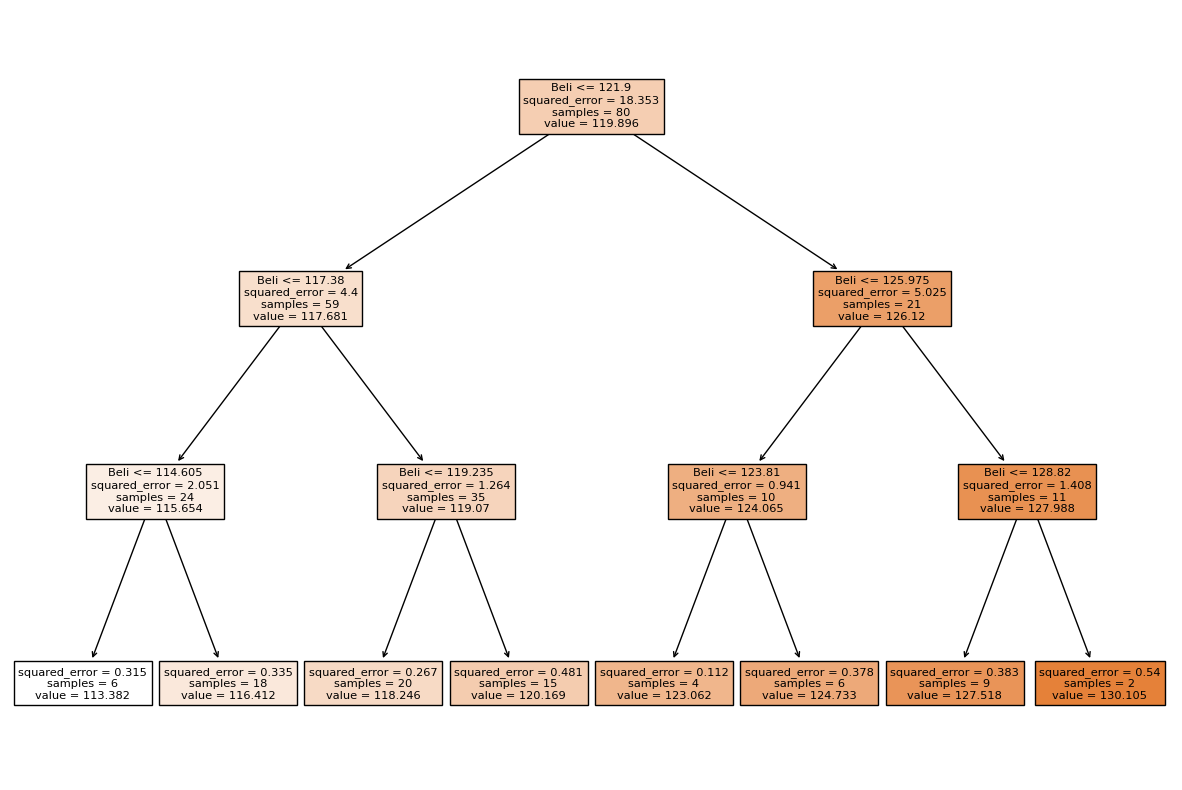

In [ ]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

In [ ]:
# save model
import pickle

In [ ]:
# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best, files)

In [ ]:
# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)

In [ ]:
# predict with saved model
dtr2.predict(X_test)

array([117.95, 113.99, 119.66, 119.37, 124.32, 120.78, 121.14, 118.57,
       116.53, 115.86, 116.89, 122.66, 125.79, 124.32, 119.9 , 117.57,
       117.19, 118.04, 113.99, 117.57])